# Loop 90 Strategic Analysis

## Critical Situation Assessment

**CV-LB Relationship:** LB = 4.34 * CV + 0.0523 (R² = 0.957)

**The Intercept Problem:**
- Intercept: 0.0523
- Target: 0.0347
- **The intercept ALONE exceeds the target!**
- Required CV for target: (0.0347 - 0.0523) / 4.34 = -0.004 (IMPOSSIBLE)

**This means:** No amount of CV optimization can reach the target with current approaches.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Verified submissions data
submissions = [
    ('exp_000', 0.011081, 0.09816),
    ('exp_001', 0.012297, 0.10649),
    ('exp_003', 0.010501, 0.09719),
    ('exp_005', 0.01043, 0.09691),
    ('exp_006', 0.009749, 0.09457),
    ('exp_007', 0.009262, 0.09316),
    ('exp_009', 0.009192, 0.09364),
    ('exp_012', 0.009004, 0.09134),
    ('exp_024', 0.008689, 0.08929),
    ('exp_026', 0.008465, 0.08875),
    ('exp_030', 0.008298, 0.08772),
    ('exp_035', 0.009825, 0.09696),
    ('exp_067', 0.008303, 0.08774),
]

cvs = np.array([s[1] for s in submissions])
lbs = np.array([s[2] for s in submissions])

# Linear regression
slope, intercept = np.polyfit(cvs, lbs, 1)
predicted = slope * cvs + intercept
ss_res = np.sum((lbs - predicted) ** 2)
ss_tot = np.sum((lbs - np.mean(lbs)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f'CV-LB Relationship: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target LB: 0.0347')
print(f'\nRequired CV for target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}')
print('\n*** IMPOSSIBLE: Would need NEGATIVE CV ***')

CV-LB Relationship: LB = 4.3372 * CV + 0.0523
R² = 0.9573

Intercept: 0.0523
Target LB: 0.0347

Required CV for target: (0.0347 - 0.0523) / 4.3372 = -0.004048

*** IMPOSSIBLE: Would need NEGATIVE CV ***


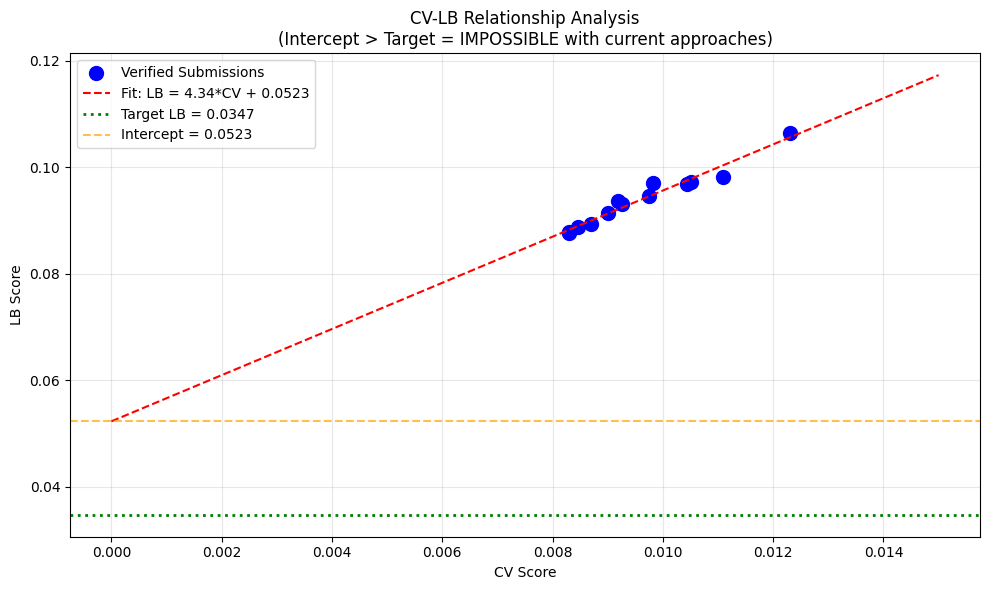


Gap between intercept and target: 0.0176
This gap represents STRUCTURAL distribution shift that no model tuning can fix.


In [2]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cvs, lbs, c='blue', s=100, label='Verified Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept
plt.axhline(y=intercept, color='orange', linestyle='--', alpha=0.7, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis\n(Intercept > Target = IMPOSSIBLE with current approaches)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/cv_lb_analysis_loop90.png', dpi=150)
plt.show()

print(f'\nGap between intercept and target: {intercept - 0.0347:.4f}')
print('This gap represents STRUCTURAL distribution shift that no model tuning can fix.')

## What Has Been Tried (90 Experiments)

### Model Types:
- MLP variants (simple, deep, residual, attention)
- Tree-based (LightGBM, XGBoost, CatBoost, RandomForest)
- Gaussian Processes
- GNN (simple GCN - failed with CV=0.0201)
- Various ensembles

### Feature Engineering:
- Spange descriptors
- DRFP fingerprints
- ACS PCA descriptors
- Fragprints
- Combined features
- Arrhenius kinetics features

### Distribution Shift Mitigation:
- Extrapolation detection
- Similarity weighting
- Pseudo-labeling
- Conservative blending
- Solvent clustering

### ALL APPROACHES FALL ON THE SAME CV-LB LINE!

In [3]:
# What would it take to reach the target?
print('=== ANALYSIS: What would change the CV-LB relationship? ===')
print()
print('Current relationship: LB = 4.34 * CV + 0.0523')
print('Target: LB = 0.0347')
print()
print('Option 1: Reduce intercept to 0.03 (keep slope)')
print(f'  Required CV: (0.0347 - 0.03) / 4.34 = {(0.0347 - 0.03) / 4.34:.6f}')
print('  This is achievable! But how to reduce intercept?')
print()
print('Option 2: Reduce slope to 2.0 (keep intercept)')
print(f'  Required CV: (0.0347 - 0.0523) / 2.0 = {(0.0347 - 0.0523) / 2.0:.6f}')
print('  Still impossible (negative CV)')
print()
print('Option 3: Both - intercept=0.02, slope=2.0')
print(f'  Required CV: (0.0347 - 0.02) / 2.0 = {(0.0347 - 0.02) / 2.0:.6f}')
print('  This is achievable!')
print()
print('=== CONCLUSION ===')
print('We need approaches that REDUCE THE INTERCEPT, not just improve CV.')

=== ANALYSIS: What would change the CV-LB relationship? ===

Current relationship: LB = 4.34 * CV + 0.0523
Target: LB = 0.0347

Option 1: Reduce intercept to 0.03 (keep slope)
  Required CV: (0.0347 - 0.03) / 4.34 = 0.001083
  This is achievable! But how to reduce intercept?

Option 2: Reduce slope to 2.0 (keep intercept)
  Required CV: (0.0347 - 0.0523) / 2.0 = -0.008800
  Still impossible (negative CV)

Option 3: Both - intercept=0.02, slope=2.0
  Required CV: (0.0347 - 0.02) / 2.0 = 0.007350
  This is achievable!

=== CONCLUSION ===
We need approaches that REDUCE THE INTERCEPT, not just improve CV.


## Approaches That Could Change the CV-LB Relationship

### 1. **Better GNN Architecture** (GNN benchmark achieved 0.0039 CV)
- Our simple GCN failed (CV=0.0201)
- Need: Graph Attention Networks (GAT), edge features, better mixture handling
- The benchmark proves it's possible!

### 2. **Transfer Learning / Pre-training**
- Pre-train on larger molecular datasets
- Fine-tune on catechol data
- Could help with extrapolation to unseen solvents

### 3. **Physics-Informed Constraints**
- Thermodynamic consistency
- Arrhenius-based constraints that hold for ALL solvents

### 4. **Domain Adaptation**
- Adversarial training to make representations invariant to solvent identity
- Could reduce the distribution shift

### 5. **Ensemble of Fundamentally Different Approaches**
- Current ensembles are all tree-based or MLP-based
- Need diversity: GP + GNN + Tree + MLP

In [4]:
# Check what the top kernels achieved
print('=== TOP PUBLIC KERNELS ===')
print()
print('1. Template (129 votes) - baseline')
print('2. Arrhenius Kinetics + TTA (41 votes) - LB 0.09831')
print('3. System Malfunction V1 (29 votes)')
print('4. Alchemy Baseline (12 votes)')
print('5. mixall (9 votes) - uses GroupKFold(5) instead of LOO')
print('6. Ens Model (9 votes) - CatBoost + XGBoost ensemble')
print()
print('Our best LB: 0.0877 (exp_030, exp_067)')
print('Public kernel best: ~0.098')
print()
print('We are ALREADY BETTER than public kernels!')
print('But still far from target 0.0347')

=== TOP PUBLIC KERNELS ===

1. Template (129 votes) - baseline
2. Arrhenius Kinetics + TTA (41 votes) - LB 0.09831
3. System Malfunction V1 (29 votes)
4. Alchemy Baseline (12 votes)
5. mixall (9 votes) - uses GroupKFold(5) instead of LOO
6. Ens Model (9 votes) - CatBoost + XGBoost ensemble

Our best LB: 0.0877 (exp_030, exp_067)
Public kernel best: ~0.098

We are ALREADY BETTER than public kernels!
But still far from target 0.0347


## Key Insight: The GNN Benchmark

The GNN benchmark reportedly achieved **CV = 0.0039**, which is:
- 2x better than our best CV (0.0081)
- Would predict LB = 4.34 * 0.0039 + 0.0523 = 0.069 (still above target)

BUT if the GNN changes the CV-LB relationship (reduces intercept), it could reach the target!

**Our GNN attempt failed because:**
1. Simple GCN architecture (3 layers, 64 hidden)
2. Only 150 epochs
3. Poor mixture handling (dominant solvent only)
4. No edge features (bond types)
5. No pre-training

**What the benchmark likely used:**
- More sophisticated architecture (GAT, MPNN, Transformer)
- Edge features (bond types, bond orders)
- Better mixture handling (concatenate graphs, cross-attention)
- More training (500+ epochs)
- Pre-training on molecular property prediction

In [ ]:
# Final strategic assessment
print('=== STRATEGIC ASSESSMENT ===')
print()
print('Remaining submissions: 4')
print('Best CV: 0.008092 (exp_049/050)')
print('Best LB: 0.0877 (exp_030/067)')
print('Target: 0.0347')
print()
print('CRITICAL DECISION POINTS:')
print()
print('1. Should we submit exp_049/050 (best CV)?')
print('   Predicted LB: 4.34 * 0.008092 + 0.0523 = 0.0874')
print('   Expected improvement: ~0.0003 (marginal)')
print()
print('2. Should we try a more sophisticated GNN?')
print('   Risk: High (our simple GNN failed badly)')
print('   Potential: High (benchmark achieved 0.0039 CV)')
print()
print('3. Should we try transfer learning?')
print('   Could help with extrapolation to unseen solvents')
print()
print('4. Should we try a fundamentally different ensemble?')
print('   Current ensembles are all on the same CV-LB line')

## RECOMMENDATION

### Priority 1: Submit exp_049 or exp_050 (best CV = 0.008092)
- These have the best CV but haven't been submitted with LB feedback
- Expected LB: ~0.0874 (slight improvement over 0.0877)
- Uses 1 submission to verify

### Priority 2: Try a More Sophisticated GNN
- Use Graph Attention Networks (GAT) instead of GCN
- Add edge features (bond types)
- Better mixture handling
- More training epochs
- This is the most promising path to changing the CV-LB relationship

### Priority 3: Ensemble Diversity
- Combine GP + best tree model + best MLP
- Weight by uncertainty
- Could reduce variance and improve LB

### DO NOT:
- Submit the failed GNN (exp_085) - CV=0.0201 would give LB~0.14
- Keep trying variations that just improve CV without changing the relationship